In [2]:
from accretion_disks.shakurasunyaevdisk import ShakuraSunyaevDisk
from accretion_disks.diskwithoutflows import InnerDisk
from accretion_disks.basedisk import CompositeDisk
from accretion_disks.compact_object import CompactObject
import numpy as np
import matplotlib.pyplot as plt

## Define compact object

In [3]:
co = CompactObject(10, a=0.5)

## SS73 disk (zona A i.e. radiation pressure dominated)

Maximum energy released occurs at 2.25 with H/R = 0.22
Total disk luminosity 0.50 LEdd


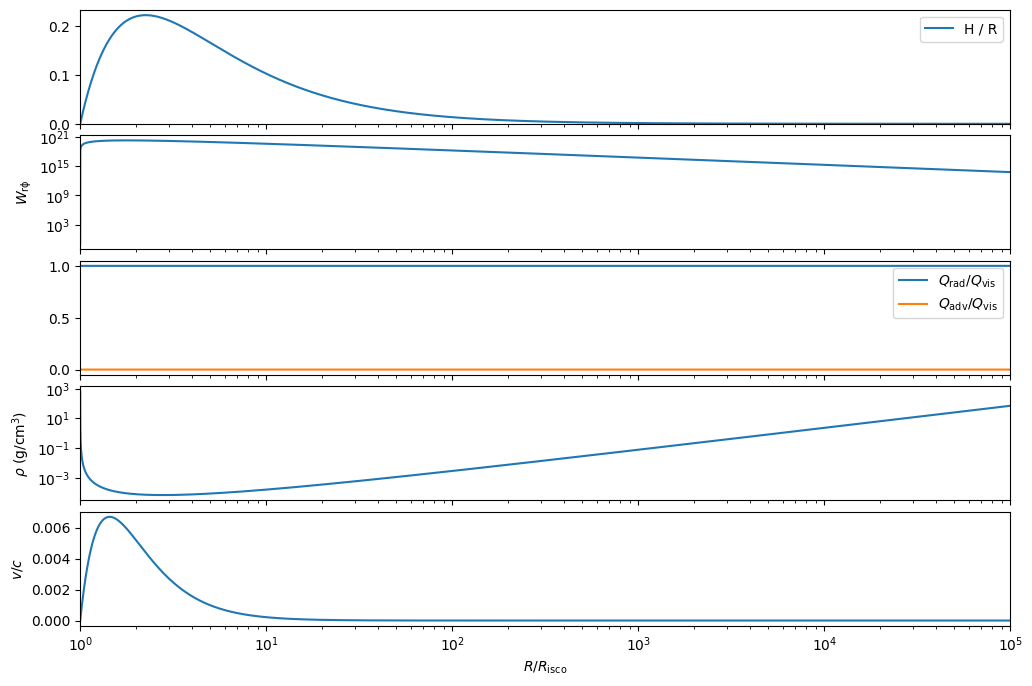

In [4]:
disk = ShakuraSunyaevDisk(co, mdot=0.5, alpha=0.1, Wrphi_in=-0.1, N=100000)
fig, axes = disk.plot()

maxQ = np.argmax(disk.Qrad * disk.R**2)
print("Maximum energy released occurs at", f"{disk.R[maxQ] / disk.CO.Risco:.2f}", f"with H/R = {disk.H[maxQ]/disk.R[maxQ]:.2f}")

print(f"Total disk luminosity {disk.L() / co.LEdd:.2f} LEdd")

Parameters can be changed without rebuilding the disk

Text(0, 0.5, '$L/L_\\mathrm{LEdd}$')

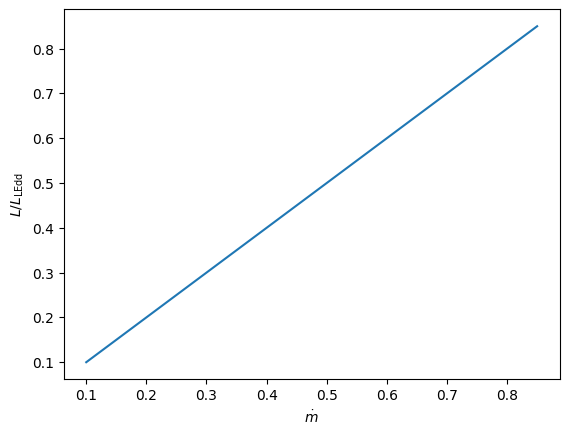

In [5]:
# Standard disk luminosity is \propto \mdot
mdots = np.arange(0.1, 0.9, 0.05)
lums = np.empty(len(mdots), dtype=float)
for i, mdot in enumerate(mdots):
    disk.mdot = mdot
    lums[i] = disk.L()
plt.plot(mdots, lums / disk.CO.LEdd)
plt.xlabel(r"$\dot{m}$")  
plt.ylabel(r"$L/L_\mathrm{LEdd}$")

## Disk with Outflows from Lipunva 1999 (inner disk has mass loss, outer disk is modified SS733)

Rsph is defined as R such that L(R>Rsph) = LEdd

Rsph = 1620.0 x mdot
Maximum energy released occurs at 1620.5 with H/R = 0.62
Total disk luminosity 5.31 LEdd


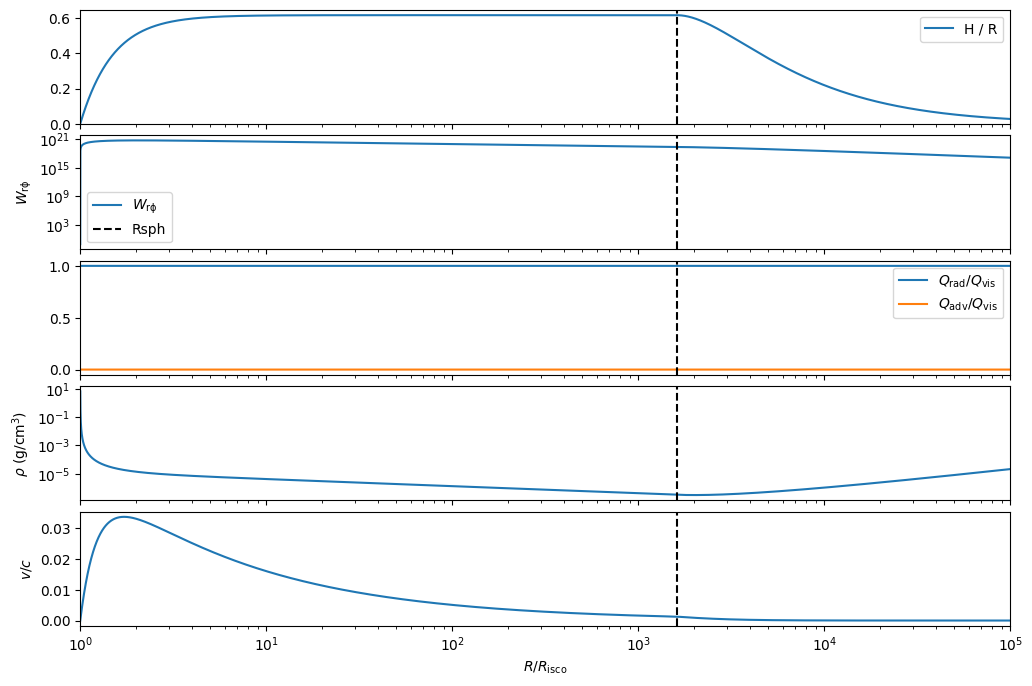

In [7]:
disk = CompositeDisk(InnerDisk, ShakuraSunyaevDisk, CO=co, mdot=1000, alpha=0.1)
fig, axes = disk.plot()
print(f"Rsph = {disk.Rsph / disk.CO.Risco:.1f} x mdot")

maxQ = np.argmax(disk.Qrad * disk.R**2)
print("Maximum energy released occurs at", f"{disk.R[maxQ] / disk.CO.Risco:.1f}", f"with H/R = {disk.H[maxQ]/disk.R[maxQ]:.2f}")

print(f"Total disk luminosity {disk.L() / co.LEdd:.2f} LEdd")
# if we integrate the disk up to Rsph we find it is equal to LEdd, as expected
np.testing.assert_almost_equal(disk.L(Rmin=disk.Rsph) / co.LEdd, 1, decimal=1)

In [8]:
def lipunova(mdot):
    return 0.6 + 0.7 * np.log(mdot)

def poutanen(mdot):
    return 1 + 3/5 * np.log(mdot)

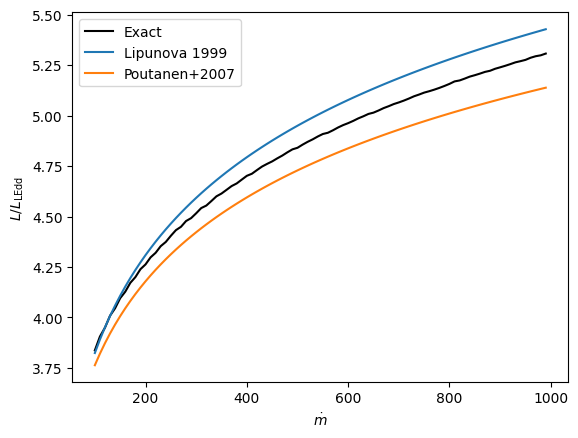

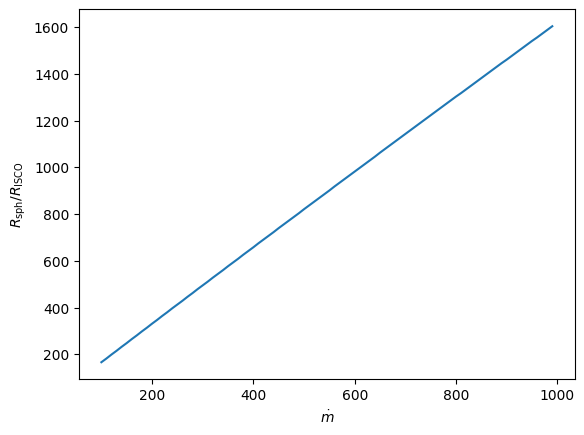

In [9]:
# Disk luminosity is \propto ln \mdot
# The dependency quoted by Lipunva (which is approximate) is shown by comparison
mdots = np.arange(100, 1000, 10)
lums = np.empty(len(mdots), dtype=float)
Rsphs = np.empty(len(mdots), dtype=float)
for i, mdot in enumerate(mdots):
    disk.mdot = mdot
    lums[i] = disk.L()
    Rsphs[i] = disk.Rsph
plt.plot(mdots, lums / disk.CO.LEdd, color="black", label="Exact")
plt.xlabel(r"$\dot{m}$")  
plt.plot(mdots, lipunova(mdots), label="Lipunova 1999")
plt.plot(mdots, poutanen(mdots), label="Poutanen+2007")
plt.ylabel(r"$L/L_\mathrm{LEdd}$")
plt.legend()


plt.figure()
plt.plot(mdots, Rsphs / disk.CO.Risco)
plt.xlabel(r"$\dot{m}$")  
plt.ylabel(r"$R_\mathrm{sph}/R_\mathrm{ISCO}$")
lipunovaRsph = 1.62
np.testing.assert_allclose(Rsphs / disk.CO.Risco / mdots, lipunovaRsph, rtol=1e-1)